<a href="https://colab.research.google.com/github/singaltanmay/motorcycle-resale-predictor/blob/master/Motorcycle_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
df = pd.read_csv('bike_details.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [92]:
df.shape

(1061, 7)

In [93]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [94]:
final_dataset = df
final_dataset.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [95]:
# Removing name from dataset as it is not statistically significant
final_dataset = df[['selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price']]

# Removing rows whose ex_showroom_price is NaN
final_dataset = final_dataset.dropna(axis=0, how='any', thresh=None, subset=["ex_showroom_price"], inplace=False)

In [96]:
print(final_dataset['ex_showroom_price'].unique())

[ 148114.   89643.   53857.   87719.   60122.   78712.   47255.   95955.
  351680.   58314.  117926.  132680.   44389.   53900.   56147.   84751.
   61600.   79432.   78350.   71049.   57557.  202310.   71150.   56750.
   84042.   69750.   59844.   42859.   73413.   49900.   59422.   57549.
   51994.   80350.   54605.   88161.   78513.   50098.  195500.   92074.
  164004.   74295.   49642.   51112.   53751.   50267.   61653.   70851.
   53079.  133680.  181445.   65626.   58438.   61118.   75936.  180525.
   87543.   80435.   85011. 1278000.  155740.  202127.   86744.  156304.
   84246.   49521.   64589.   69983.   54299.   72303.   65800.   58757.
   47032.   79233.  118997.   52949.   64071.   61545.  168482.  163331.
   59095.   75502.   52271.   63331.   52372.   58630.   94703.   53436.
   59183.   56925.   55980.   52790.   81508.  199275.   87042.  107500.
   67187.   67214.   49412.  599000.  317934.   54760.  171646.  752020.
   67469.   78316.   44140.  534000.   72973.   571

In [97]:
# Adding a new column
final_dataset['current_Year']=2021

# Calculating number of years
final_dataset['no_year'] = final_dataset['current_Year'] - final_dataset['year']

# Removing cols not needed anymore
final_dataset.drop(['year'], axis=1, inplace=True)
final_dataset.drop(['current_Year'], axis=1, inplace=True)

final_dataset.head()

,selling_price,seller_type,owner,km_driven,ex_showroom_price,no_year
2,150000,Individual,1st owner,12000,148114.0,3
3,65000,Individual,1st owner,23000,89643.0,6
5,18000,Individual,1st owner,60000,53857.0,11
6,78500,Individual,1st owner,17000,87719.0,3
9,50000,Individual,1st owner,42000,60122.0,5


In [98]:
# one-hot encoding with drop_first to evade summy variable trap
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [99]:
final_dataset.corr()

,selling_price,km_driven,ex_showroom_price,no_year,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
selling_price,1.000000,-0.194093,0.918583,-0.350654,-0.004508,0.030686,-0.023316,0.180802
km_driven,-0.194093,1.000000,-0.122011,0.329823,0.027825,-0.021622,-0.002698,-0.023037
ex_showroom_price,0.918583,-0.122011,1.000000,-0.126378,-0.000517,0.109045,-0.020923,0.230409
no_year,-0.350654,0.329823,-0.126378,1.000000,0.012262,0.129020,0.041416,0.010613
seller_type_Individual,-0.004508,0.027825,-0.000517,0.012262,1.000000,0.023823,0.004815,0.002776
owner_2nd owner,0.030686,-0.021622,0.109045,0.129020,0.023823,1.000000,-0.023823,-0.013732
owner_3rd owner,-0.023316,-0.002698,-0.020923,0.041416,0.004815,-0.023823,1.000000,-0.002776
owner_4th owner,0.180802,-0.023037,0.230409,0.010613,0.002776,-0.013732,-0.002776,1.000000


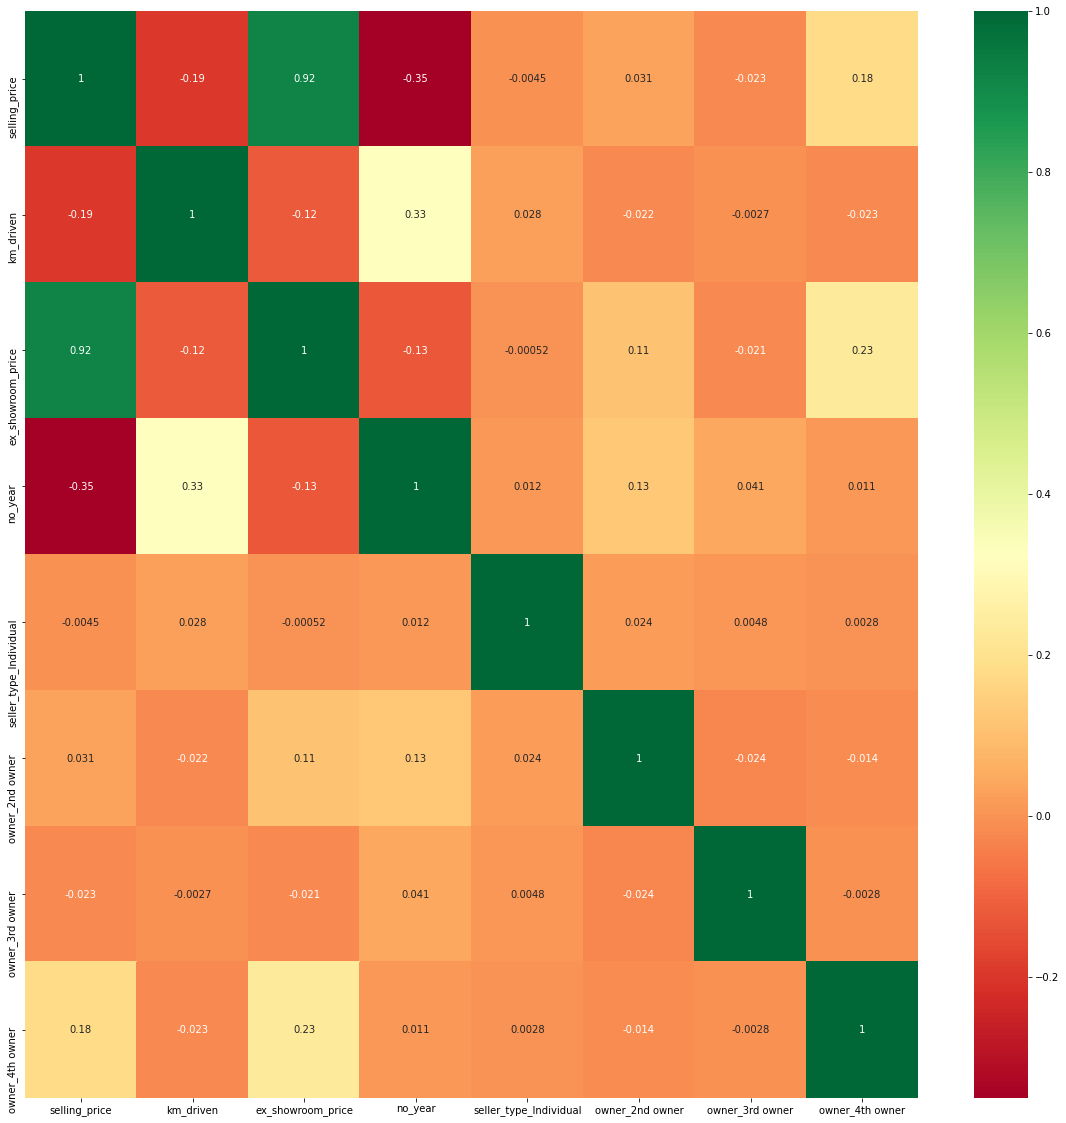

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plot heatmap
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [101]:
final_dataset.head()

,selling_price,km_driven,ex_showroom_price,no_year,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
2,150000,12000,148114.0,3,1,0,0,0
3,65000,23000,89643.0,6,1,0,0,0
5,18000,60000,53857.0,11,1,0,0,0
6,78500,17000,87719.0,3,1,0,0,0
9,50000,42000,60122.0,5,1,0,0,0


In [102]:
# All other are independent features
X = final_dataset.iloc[:,1:]
# Selling price is the dependent feature
Y = final_dataset.iloc[:,0]

In [103]:
X['km_driven'] = X['km_driven'].div(1000)
Y = Y.div(1000)

In [107]:
X.head()

,km_driven,ex_showroom_price,no_year,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
2,12.0,148114.0,3,1,0,0,0
3,23.0,89643.0,6,1,0,0,0
5,60.0,53857.0,11,1,0,0,0
6,17.0,87719.0,3,1,0,0,0
9,42.0,60122.0,5,1,0,0,0


In [105]:
Y.head()

2    150.0
3     65.0
5     18.0
6     78.5
9     50.0
Name: selling_price, dtype: float64

In [109]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[3.24380065e-02 8.73701854e-01 7.69702574e-02 2.86049026e-04
 1.39409146e-02 5.81188940e-05 2.60479941e-03]


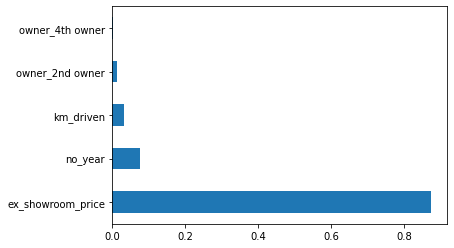

In [110]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [112]:
X_train.shape

(500, 7)

In [113]:
import numpy as np
# Hyperparameters

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Number of levels in tree
max_depth = [int (x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples requiered at each leaf node
min_samples_leaf = [1,2,5,10]

# Create the random grid
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf    
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# RandomizedSearchCV will select the best parameters from the random_grid
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state=42, n_jobs = 1)

In [128]:
# Training the model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [130]:
predictions = rf_random.predict(X_test)

In [131]:
print(Y_test - predictions)

816      0.311384
890     37.189348
392      8.600701
386    -15.683359
878      8.057496
          ...    
627     -9.802539
409      5.384269
1041    -9.716345
352     -3.513345
722     -7.778803
Name: selling_price, Length: 126, dtype: float64


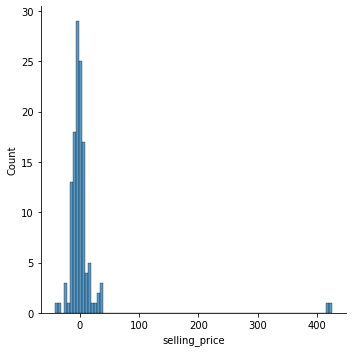

In [137]:
sns.displot(Y_test - predictions)

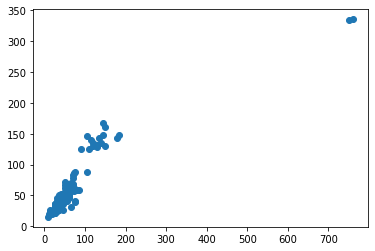

In [138]:
plt.scatter(Y_test, predictions)

In [140]:
import pickle
file = open('motorcycle_price_predictor_model.pkl', 'wb')
pickle.dump(rf_random, file)